In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**DateSet1 using Matrix inverse**

In [2]:
df = pd.read_csv('/kaggle/input/data1-csv/Data1.csv')

In [3]:
df

,x,y
0,0.1,8.298133
1,0.2,4.919282
2,0.3,4.145139
3,0.4,6.850788
4,0.5,6.375323
...,...,...
95,9.6,28.420698
96,9.7,27.984652
97,9.8,30.336851
98,9.9,30.376285


In [4]:
x1 = np.array(df['x'])
a = sum(x1)

In [5]:
c = sum([i**2 for i in x1])

In [6]:
matrix_A = [[a, len(df)],[c, a]]

In [7]:
print(matrix_A)

[[505.0, 100], [3383.5000000000005, 505.0]]


In [8]:
A_inv = np.linalg.inv(matrix_A)

In [9]:
print(A_inv)

[[-0.00606061  0.00120012]
 [ 0.04060606 -0.00606061]]


In [10]:
y1 = np.array(df['y'])
p = sum(y1)

In [11]:
q = x1*y1
print(sum(q))

10935.264732518895


In [12]:
B = [[p], [sum(q)]]

In [13]:
w = A_inv@B

In [14]:
w

array([[2.38406007],
       [5.68078713]])

In [15]:
w[0]

array([2.38406007])

In [16]:
y_list = [((w[0])*i + w[1]) for i in df['x']]

In [17]:
df['predicted'] = np.array(y_list)

In [18]:
df

,x,y,predicted
0,0.1,8.298133,5.919193
1,0.2,4.919282,6.157599
2,0.3,4.145139,6.396005
3,0.4,6.850788,6.634411
4,0.5,6.375323,6.872817
...,...,...,...
95,9.6,28.420698,28.567764
96,9.7,27.984652,28.806170
97,9.8,30.336851,29.044576
98,9.9,30.376285,29.282982


In [19]:
def R2(df):
  return 1 - Rss(df) / Tss(df)

In [20]:
def Rss(df):
  return np.sum((df['y'] - df['predicted']) ** 2)

In [21]:
def Tss(df):
  return np.sum((df['y'] - np.mean(df['predicted']))** 2)

In [22]:
R2(df)

0.9579571905586357

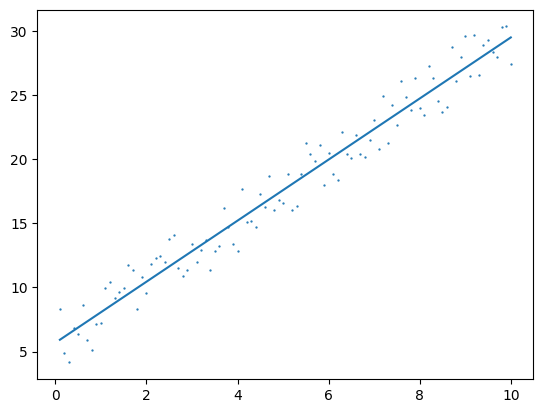

In [23]:
x_list = [float(i) for i in df['x']]
y_list = [float(i) for i in df['y']]
plt.scatter(x_list, y_list,s=0.4)
plt.plot(x_list, df['predicted'])
plt.show()

**Verify using Scikit Learn**

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [25]:
X = df[['x']]
y = df[['y']]
lr.fit(X,y)

LinearRegression()

In [26]:
y_predict = lr.predict(X)

In [27]:
r_squared = r2_score(y, y_predict)
print(f'R-squared: {r_squared}')

R-squared: 0.9579571905586357


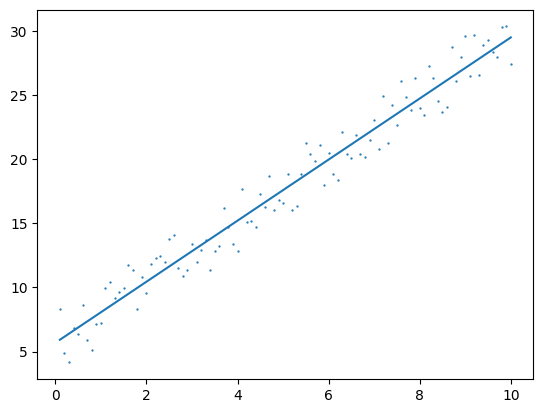

In [28]:
x_list = [float(i) for i in df['x']]
y_list = [float(i) for i in df['y']]
plt.scatter(x_list, y_list,s=0.4)
plt.plot(x_list, y_predict)
plt.show()